<a href="https://colab.research.google.com/github/springboardmentor458/OBJECT_RECOGNITION_SYSTEM_Infosys_Internship_Oct2024/blob/Rohan-Arora/Faster_rcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 139MB/s]


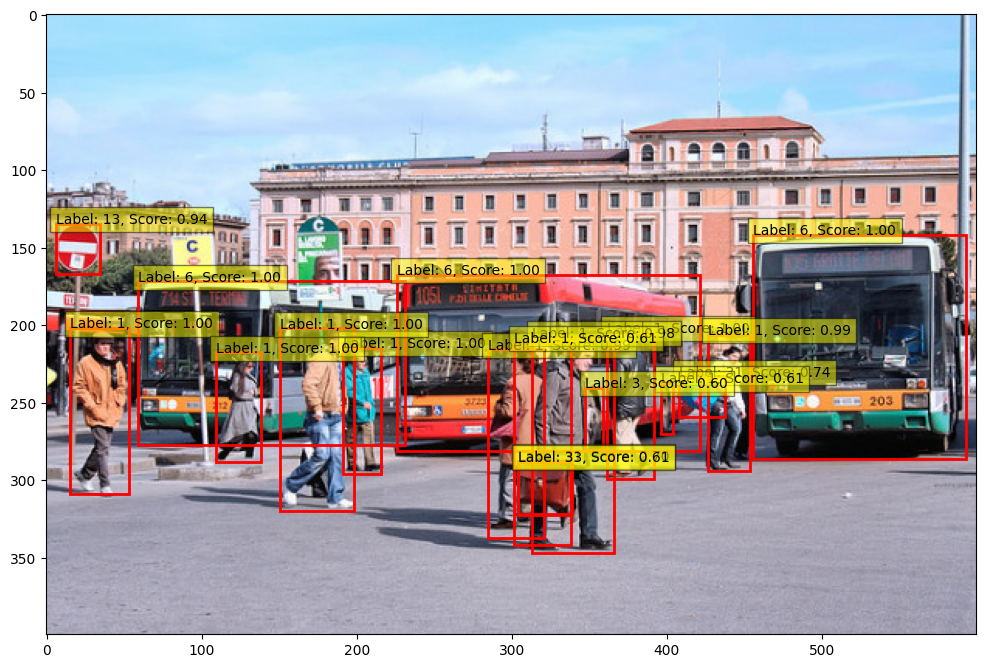

In [1]:
import torch
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained Faster R-CNN model from torchvision
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Load an image for testing
image_path = "/content/image faster.jpg"  # Replace with your image path
image = Image.open(image_path)

# Define the image transformations
transform = transforms.Compose([
    transforms.ToTensor()  # Convert the image to a tensor
])

# Apply the transformations to the image
image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

# Perform inference with the model
with torch.no_grad():  # No need to calculate gradients for inference
    prediction = model(image_tensor)

# Extract the boxes, labels, and scores from the prediction
boxes = prediction[0]['boxes'].numpy()
labels = prediction[0]['labels'].numpy()
scores = prediction[0]['scores'].numpy()

# Visualize the results
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Loop through each prediction and plot the bounding boxes and labels
for box, label, score in zip(boxes, labels, scores):
    if score > 0.5:  # Display only predictions with confidence > 50%
        xmin, ymin, xmax, ymax = box
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   linewidth=2, edgecolor='r', facecolor='none'))
        ax.text(xmin, ymin, f'Label: {label}, Score: {score:.2f}',
                bbox=dict(facecolor='yellow', alpha=0.5), fontsize=10, color='black')

plt.show()
